In [2]:
import shared.mba263 as mba263
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd


In [3]:
data = pd.read_csv('shared/cell2cell.csv')


Step 1: Data cleanup

In [4]:
data.info()#check null value counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71047 entries, 0 to 71046
Data columns (total 70 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   customer  71047 non-null  int64  
 1   calibrat  71047 non-null  int64  
 2   churn     71047 non-null  int64  
 3   churndep  40000 non-null  float64
 4   revenue   70831 non-null  float64
 5   mou       70831 non-null  float64
 6   recchrge  70831 non-null  float64
 7   directas  70831 non-null  float64
 8   overage   70831 non-null  float64
 9   roam      70831 non-null  float64
 10  changem   70545 non-null  float64
 11  changer   70545 non-null  float64
 12  dropvce   71047 non-null  float64
 13  blckvce   71047 non-null  float64
 14  unansvce  71047 non-null  float64
 15  custcare  71047 non-null  float64
 16  threeway  71047 non-null  float64
 17  mourec    71047 non-null  float64
 18  outcalls  71047 non-null  float64
 19  incalls   71047 non-null  float64
 20  peakvce   71047 non-null  fl

replace missing data with mean


In [45]:
updated_data = data
updated_data[['revenue','changem','mou','recchrge','directas','roam','overage','changer','age1','age2']]=updated_data[['revenue','changem','mou','recchrge','directas','roam','overage','changer','age1','age2']].fillna(updated_data[['revenue','changem','mou','recchrge','directas','roam','overage','changer','age1','age2']].mean())

Step 2: Create calibration and validation data sets

In [46]:
calib = updated_data.loc[updated_data['calibrat'] ==1]
valid = updated_data.loc[updated_data['calibrat']==0]

Step 3: Run initial Logit Regression 

create initial var list for logit

In [47]:
fullList = ['revenue', 'mou', 'recchrge', 'directas', 'overage', 'roam', 'changem', 'changer', 'dropvce', 'blckvce',
 'unansvce', 'custcare', 'threeway', 'mourec', 'outcalls', 'incalls', 'peakvce', 'opeakvce', 'dropblk', 'callfwdv', 'callwait',
 'months', 'uniqsubs', 'actvsubs', 'phones', 'models', 'eqpdays', 'age1', 'age2', 'children', 'credita', 'creditaa', 'prizmrur',
 'prizmub', 'prizmtwn', 'refurb', 'webcap', 'truck', 'rv', 'occprof', 'occcler', 'occcrft', 'occstud', 'occhmkr', 'occret', 'occself',
 'ownrent', 'marryun', 'marryyes', 'mailord', 'mailres', 'mailflag', 'travel', 'pcown', 'creditcd', 'retcalls', 'retaccpt', 'newcelly',
 'newcelln', 'refer', 'incmiss', 'income', 'mcycle', 'setprcm', 'setprc', 'retcall']
len(fullList)

66

In [48]:
churn1=mba263.logit(calib['churndep'],calib[fullList])
churn1.summary()

Optimization terminated successfully.
         Current function value: 0.670845
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Mba263Logit Regression Results                        
==============================================================================
Dep. Variable:               churndep   No. Observations:                40000
Model:                    Mba263Logit   Df Residuals:                    39933
Method:                           MLE   Df Model:                           66
Date:                Tue, 05 Apr 2022   Pseudo R-squ.:                 0.03218
Time:                        03:15:01   Log-Likelihood:                -26834.
converged:                       True   LL-Null:                       -27726.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1559      0.094      1.658      0.097      -0.028       0.340
revenue        0.0021      0.001      2.742      0.006       0.001       0.004
mou           -0.0003   4.87e-05     -5.278      0.000      -0.000      -0.000
recchrge      -0.0035      0.001     -4.012      0.000      -0.005      -0.002
directas      -0.0001      0.006     -0.019      0.985      -0.012       0.011
overage        0.0007      0.000      2.635      0.008       0.000       0.001
roam           0.0063      0.002      3.186      0.001       0.002       0.010
changem       -0.0005   5.28e-05     -9.156      0.000      -0.001      -0.000
changer        0.0022      0.000      5.936      0.000       0.001       0.003
dropvce        0.0135      0.006      2.340      0.019       0.002       0.025
blckvce        0.0086      0.006      1.531      0.126      -0.002       0.020
unansvce       0.0009      0.000      1.935      0.053   -1.11e-05       0.002
custcare      -0.0064      0.003     -2.491      0.013      -0.011      -0.001
threeway      -0.0297      0.011     -2.674      0.007      -0.052      -0.008
mourec         0.0001      0.000      0.934      0.350      -0.000       0.000
outcalls       0.0012      0.001      2.157      0.031       0.000       0.002
incalls       -0.0033      0.001     -3.158      0.002      -0.005      -0.001
peakvce       -0.0007      0.000     -3.392      0.001      -0.001      -0.000
opeakvce      -0.0002      0.000     -0.914      0.361      -0.001       0.000
dropblk       -0.0055      0.005     -0.998      0.318      -0.016       0.005
callfwdv       0.0025      0.022      0.117      0.907      -0.040       0.045
callwait       0.0025      0.003      0.799      0.424      -0.004       0.009
months        -0.0219      0.002    -11.131      0.000      -0.026      -0.018
uniqsubs       0.1851      0.020      9.383      0.000       0.146       0.224
actvsubs      -0.1952      0.027     -7.134      0.000      -0.249      -0.142
phones         0.0484      0.018      2.695      0.007       0.013       0.084
models         0.0147      0.028      0.535      0.593      -0.039       0.069
eqpdays        0.0015   7.36e-05     20.086      0.000       0.001       0.002
age1          -0.0038      0.001     -4.460      0.000      -0.005      -0.002
age2          -0.0012      0.001     -1.713      0.087      -0.002       0.000
children       0.0953      0.028      3.398      0.001       0.040       0.150
credita       -0.1568      0.035     -4.478      0.000      -0.225      -0.088
creditaa      -0.3443      0.034    -10.129      0.000      -0.411      -0.278
prizmrur       0.0692      0.049      1.411      0.158      -0.027       0.165
prizmub       -0.0381      0.024     -1.580      0.114      -0.085       0.009
prizmtwn       0.0427      0.031      1.371      0.170      -0.018       0.104
refurb         0.2331      0.032      7.385      0.000       0.171       0.295
webcap        -0.1465      0.037     -3.945      0.000      -0.219      -0.074
tr

In [12]:
valid['predict_churn1']=churn1.predict(valid[fullList])
calib['predict_churn1']=churn1.predict(calib[fullList])

Determine Model Lift

In [13]:
mba263.lift(calib['churn'],calib['predict_churn1'])
mba263.lift(valid['churn'],valid['predict_churn1'])

array([175.67523117, 167.49307973, 152.15874685, 142.04069996,
       135.30377668, 126.4408543 , 119.16600402, 112.89361991,
       107.09877822, 100.        ])

Plot Lift

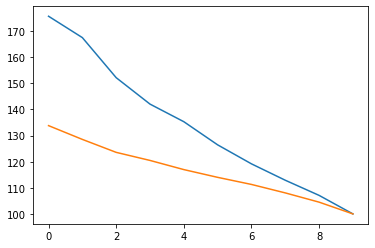

In [14]:
plt.plot(mba263.lift(valid['churn'],valid['predict_churn']))
plt.plot(mba263.lift(calib['churn'],calib['predict_churn']))

Step 4: Determine important variables

Normalize odds ratio

In [16]:
x_std1=valid[fullList].std()
x_std1

revenue      44.318897
mou         535.953234
recchrge     24.120226
directas      2.346030
overage      93.690600
               ...    
income        3.127723
mcycle        0.112496
setprcm       0.497041
setprc       57.561782
retcall       0.158540
Length: 66, dtype: float64

In [17]:
odds_ratios1=mba263.odds_ratios(churn1)['Odds ratios']
odds_ratios1

revenue     1.002140
mou         0.999743
recchrge    0.996512
directas    0.999890
overage     1.000721
              ...   
income      0.986356
mcycle      1.130355
setprcm     0.899214
setprc      1.000642
retcall     2.146001
Name: Odds ratios, Length: 66, dtype: float64

In [18]:
normalized_odds_ratios1=np.power(odds_ratios1,x_std1)
normalized_odds_ratios1

revenue     1.099374
mou         0.871370
recchrge    0.919180
directas    0.999741
overage     1.069847
              ...   
income      0.957943
mcycle      1.013880
setprcm     0.948567
setprc      1.037629
retcall     1.128695
Length: 66, dtype: float64

rank importance

In [98]:
normalized_odds_ratios1[normalized_odds_ratios1<1]=1/normalized_odds_ratios1[normalized_odds_ratios1<1]
rank = pd.DataFrame(normalized_odds_ratios1.sort_values(ascending=False)).reset_index()#make sure to reset index
rank.to_csv('Ind_Var_Rank')

Step 5: Trim var list to a shorter list

In [91]:
cutoff = 1.03 #determine cutoff normalized odds ratio
varList = rank.loc[rank[0]>cutoff] #create dataframe of the list
varList = varList['index'].unique()
varList = varList.tolist()#convert numpy array to list
len(varList)

41

Step 6. Repeat regression

In [92]:
churn2=mba263.logit(calib['churndep'],calib[varList])
churn2.summary()

Optimization terminated successfully.
         Current function value: 0.671130
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Mba263Logit Regression Results                        
==============================================================================
Dep. Variable:               churndep   No. Observations:                40000
Model:                    Mba263Logit   Df Residuals:                    39958
Method:                           MLE   Df Model:                           41
Date:                Tue, 05 Apr 2022   Pseudo R-squ.:                 0.03176
Time:                        03:53:37   Log-Likelihood:                -26845.
converged:                       True   LL-Null:                       -27726.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2082      0.083      2.523      0.012       0.046       0.370
eqpdays        0.0015   7.17e-05     20.497      0.000       0.001       0.002
months        -0.0218      0.002    -11.553      0.000      -0.026      -0.018
uniqsubs       0.1863      0.020      9.461      0.000       0.148       0.225
mou           -0.0003   4.82e-05     -5.379      0.000      -0.000      -0.000
dropvce        0.0136      0.006      2.345      0.019       0.002       0.025
actvsubs      -0.1956      0.027     -7.154      0.000      -0.249      -0.142
retcall        0.7713      0.190      4.051      0.000       0.398       1.144
changem       -0.0005   5.28e-05     -9.162      0.000      -0.001      -0.000
creditaa      -0.3471      0.034    -10.248      0.000      -0.414      -0.281
revenue        0.0021      0.001      2.703      0.007       0.001       0.004
blckvce        0.0091      0.006      1.597      0.110      -0.002       0.020
dropblk       -0.0057      0.006     -1.033      0.302      -0.017       0.005
recchrge      -0.0034      0.001     -3.968      0.000      -0.005      -0.002
age1          -0.0038      0.001     -4.546      0.000      -0.005      -0.002
changer        0.0021      0.000      5.915      0.000       0.001       0.003
refurb         0.2325      0.031      7.418      0.000       0.171       0.294
peakvce       -0.0007      0.000     -3.329      0.001      -0.001      -0.000
overage        0.0008      0.000      2.853      0.004       0.000       0.001
phones         0.0556      0.013      4.404      0.000       0.031       0.080
roam           0.0067      0.002      3.384      0.001       0.003       0.011
mailres       -0.1176      0.027     -4.342      0.000      -0.171      -0.065
incalls       -0.0031      0.001     -3.025      0.002      -0.005      -0.001
setprcm       -0.1081      0.040     -2.720      0.007      -0.186      -0.030
marryun        0.1003      0.034      2.981      0.003       0.034       0.166
credita       -0.1564      0.035     -4.474      0.000      -0.225      -0.088
incmiss       -0.1549      0.050     -3.084      0.002      -0.253      -0.056
outcalls       0.0012      0.001      2.028      0.043    3.86e-05       0.002
income        -0.0155      0.006     -2.689      0.007      -0.027      -0.004
webcap        -0.1474      0.037     -3.981      0.000      -0.220      -0.075
children       0.1040      0.027      3.797      0.000       0.050       0.158
threeway      -0.0305      0.011     -2.737      0.006      -0.052      -0.009
setprc         0.0006      0.000      2.250      0.024    8.06e-05       0.001
unansvce       0.0009      0.000      2.002      0.045    1.84e-05       0.002
custcare      -0.0065      0.003     -2.560      0.010      -0.012      -0.002
age2          -0.0010      0.001     -1.450      0.147      -0.002       0.000
marryyes       0.0619      0.032      1.938      0.053      -0.001       0.125
newcelly      -0.0678      0.026     -2.587      0.010      -0.119      -0.016
re

In [93]:
valid['predict_churn2']=churn2.predict(valid[varList])
calib['predict_churn2']=churn2.predict(calib[varList])

In [94]:
mba263.lift(calib['churn'],calib['predict_churn2'])
mba263.lift(valid['churn'],valid['predict_churn2'])

array([180.60070494, 161.74576817, 150.51674598, 140.39861095,
       133.99014778, 126.4408543 , 119.40058277, 111.86731428,
       106.55142501, 100.        ])

In [95]:
calib['grading']=10-mba263.ntile(calib['predict_churn2'],10)
valid['grading']=10-mba263.ntile(valid['predict_churn2'],10)

<AxesSubplot:xlabel='grading'>

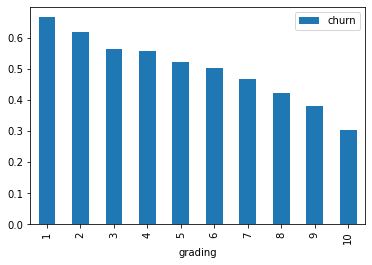

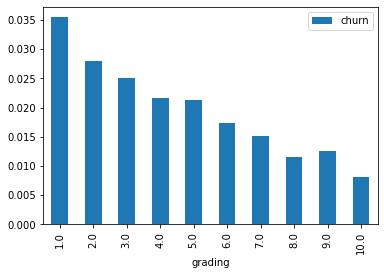

In [96]:
calib[ ['churn','grading'] ].groupby('grading').mean().plot(kind='bar')
valid[ ['churn','grading'] ].groupby('grading').mean().plot(kind='bar')

Better lift achieved than initial model. And constant is statistically significant. Keep the new varList